<a href="https://colab.research.google.com/github/JamilePolycarpo/RedesNeurais-Imagem3D/blob/main/ImagemRedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto desafio - 3
###### Image Matching Challenge 2022 + Geração de modelo 3D

### Integrantes

*   Edgar
*   Eder
*   Jamile
*   José
*   Bárbara
*   Wander

# Instruções.
O código está dividido em classificação e geração do modelo 3D. Ao seguir a ordem de execução, você terá o modelo 3D gerado a partir da classificação.

O Link da imagem a ser classificada deve ser inserida na variável "test_img"

# Classificação

In [2]:
#!pip install kaggle
#caso seja necessário atualizar a biblioteca no google colab

from google.colab import files
files.upload() #enviar o arquivo kaggle.json

#antes de importar o dataset nós iremos provisionar o local de armazenamento
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Alterar a permissão para evitar o aviso durante a partida da ferramenta Kaggle
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

#Aceitar a competição e copiar o endereço da API para o download do dataset
!kaggle competitions download -c image-matching-challenge-2022
#Descompactar o arquivo baixado
!unzip \*.zip  && rm *.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: train/buckingham_palace/images/42572558_3847795752.jpg  
  inflating: train/buckingham_palace/images/43210627_10009473243.jpg  
  inflating: train/buckingham_palace/images/43583354_7506898338.jpg  
  inflating: train/buckingham_palace/images/43641758_9015255137.jpg  
  inflating: train/buckingham_palace/images/43728242_3176119914.jpg  
  inflating: train/buckingham_palace/images/43847879_5656257946.jpg  
  inflating: train/buckingham_palace/images/44446238_9117834424.jpg  
  inflating: train/buckingham_palace/images/44573130_5715131949.jpg  
  inflating: train/buckingham_palace/images/44579495_1325305773.jpg  
  inflating: train/buckingham_palace/images/44944081_6780023064.jpg  
  inflating: train/buckingham_palace/images/45136306_6779959250.jpg  
  inflating: train/buckingham_palace/images/45439163_5667030438.jpg  
  inflating: train/buckingham_palace/images/45955845_8872058158.jpg  
  inflating: train/buckingham_

In [57]:
import os
import shutil
import random
from PIL import Image
import cv2
import imghdr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing import image

#
source_dir = "/content/train"
target_dir = "/content/test_images"

# Definindo a quantidade de fotos em cada
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

# Criando as pastas de validacao, treino e teste
train_dir = os.path.join(target_dir, "treino")
val_dir = os.path.join(target_dir, "validacao")
test_dir = os.path.join(target_dir, "teste")

# Create the directories for train, validation, and test sets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each subdirectory in the source directory
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name, "images")

    if os.path.isdir(folder_path):
        #lista de todas as pastas
        images = os.listdir(folder_path)

        # Dividindo as imagens entre as pastas
        num_images = len(images)
        num_train = int(num_images * train_ratio)
        num_val = int(num_images * val_ratio)
        num_test = int(num_images * test_ratio)

        # Criando as subpastas
        train_class_dir = os.path.join(train_dir, folder_name)
        val_class_dir = os.path.join(val_dir, folder_name)
        test_class_dir = os.path.join(test_dir, folder_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(val_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        print(val_class_dir)


        # Movendo as imagens para a pasta correspondente
        for i in range(num_images):
            image_path = os.path.join(folder_path, images[i])
            if os.path.isfile(image_path):
                if i < num_train:
                    shutil.move(image_path, train_class_dir)
                elif i < num_train + num_val:
                    shutil.move(image_path, val_class_dir)
                else:
                    shutil.move(image_path, test_class_dir)


/content/test_images/validacao/st_peters_square
/content/test_images/validacao/temple_nara_japan
/content/test_images/validacao/lincoln_memorial_statue
/content/test_images/validacao/pantheon_exterior
/content/test_images/validacao/notre_dame_front_facade
/content/test_images/validacao/taj_mahal
/content/test_images/validacao/sagrada_familia
/content/test_images/validacao/sacre_coeur
/content/test_images/validacao/grand_place_brussels
/content/test_images/validacao/british_museum
/content/test_images/validacao/buckingham_palace
/content/test_images/validacao/piazza_san_marco
/content/test_images/validacao/colosseum_exterior
/content/test_images/validacao/brandenburg_gate
/content/test_images/validacao/trevi_fountain
/content/test_images/validacao/st_pauls_cathedral


In [58]:
import cv2
import imghdr

#removendo fotos com extensões não compativeis


image_exts = ['jpeg', 'jpg', 'bmp', 'png']

for image_class in os.listdir(target_dir):#percorrendo todas as pastas
  if os.path.isdir(image_class):
   for image in os.listdir(os.path.join(target_dir, image_class)): #percorrendo todas as fotos de todas as pastas
     image_path = os.path.join(target_dir,image_class,image)

     try:
       img = cv2.imread(image_path)
       tip = imghdr.what(image_path)
       if tip not in image_exts:
         print("Imagem não está na extensao certa{}".format(image_path))
         os.remove(image_path)
     except Exception as e:
       print("Problema com a imagem{}".format(image_path))



In [59]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory('/content/test_images/treino', batch_size=32)
validation_dataset = image_dataset_from_directory('/content/test_images/validacao',batch_size=32)

test_dataset = image_dataset_from_directory('/content/test_images/teste',batch_size=32)


Found 3966 files belonging to 16 classes.
Found 1130 files belonging to 16 classes.
Found 582 files belonging to 16 classes.


In [60]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('/content/test_images/treino', batch_size = 64)
data_iterator = data.as_numpy_iterator()
batch_train = data_iterator.next()
batch_train[0].shape
batch_train[1]

data1 = tf.keras.utils.image_dataset_from_directory('/content/test_images/validacao')
data_iterator1 = data1.as_numpy_iterator()
batch_val = data_iterator1.next()
batch_val[0].shape
batch_val[1]

# print("class_names: ", data1.class_names)
# print("/n /n batch_val: ", batch_val[1])

# Guarda os nomes dos monumentos
classs_names_monument = data1.class_names

Found 3966 files belonging to 16 classes.
Found 1130 files belonging to 16 classes.


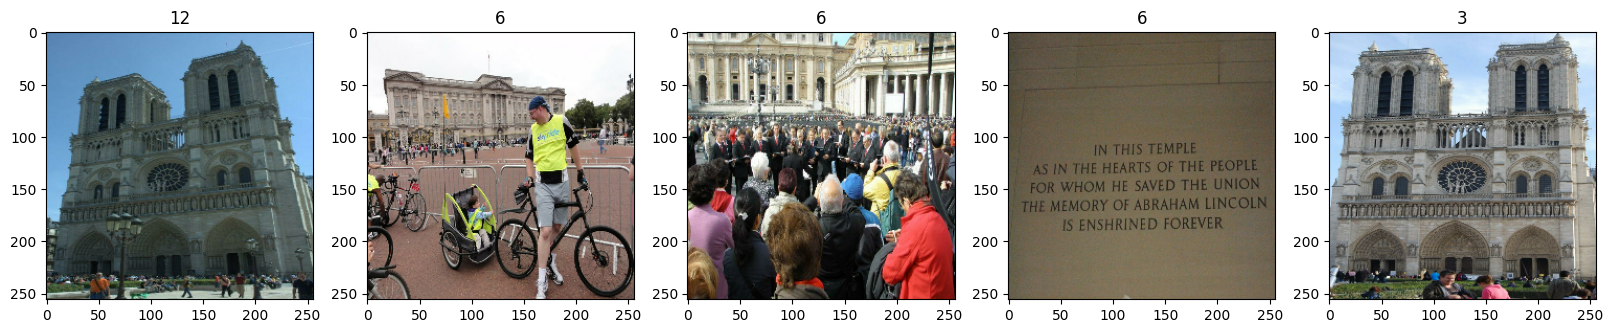

In [61]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch_train[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch_val[1][idx])


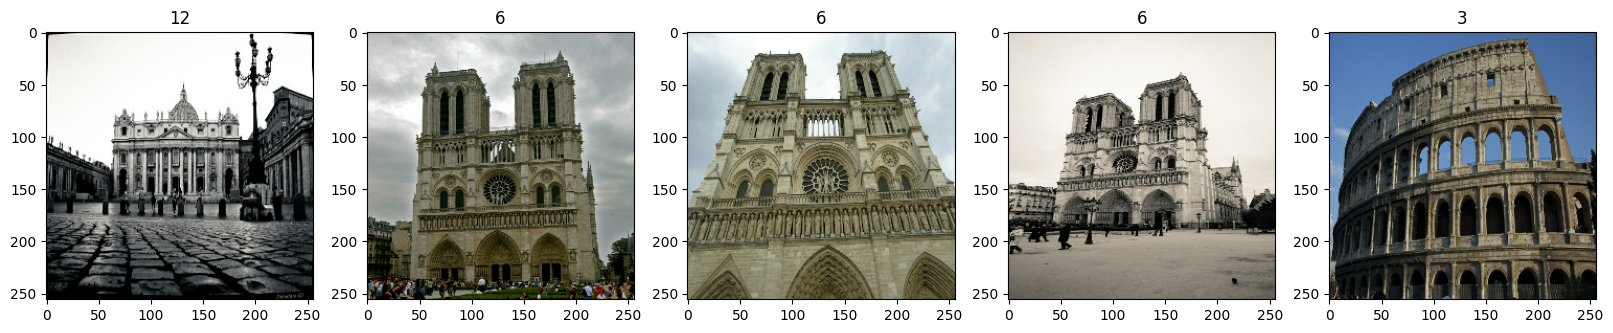

In [62]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch_val[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch_val[1][idx])

In [63]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import layers

image, label = next(iter(train_dataset))
resize_rescale = tf.keras.Sequential([layers.Resizing(256,256),
                                      layers.Rescaling(1/255)])

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2)
  #layers.RandomZoom(0.5)
])


model1 = keras.Sequential([resize_rescale, data_augmentation])

#model1.add(Rescaling(scale=1.0/255))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))



model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(16, activation="softmax"))

model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [64]:
#Treino

from tensorflow.keras.callbacks import ModelCheckpoint


hist = model1.fit(train_dataset, epochs=40, batch_size = 32,validation_data=validation_dataset)




Epoch 1/40
124/124 [==============================] - 45s 313ms/step - loss: 6.0715 - accuracy: 0.2012 - val_loss: 17.4828 - val_accuracy: 0.0619
Epoch 2/40
124/124 [==============================] - 36s 275ms/step - loss: 2.4336 - accuracy: 0.2668 - val_loss: 7.5303 - val_accuracy: 0.0717
Epoch 3/40
124/124 [==============================] - 36s 276ms/step - loss: 2.3797 - accuracy: 0.2542 - val_loss: 4.3181 - val_accuracy: 0.1035
Epoch 4/40
124/124 [==============================] - 36s 280ms/step - loss: 2.1992 - accuracy: 0.2975 - val_loss: 2.9809 - val_accuracy: 0.2566
Epoch 5/40
124/124 [==============================] - 36s 277ms/step - loss: 2.1310 - accuracy: 0.3422 - val_loss: 3.2889 - val_accuracy: 0.2611
Epoch 6/40
124/124 [==============================] - 36s 279ms/step - loss: 2.0285 - accuracy: 0.3777 - val_loss: 1.9405 - val_accuracy: 0.4000
Epoch 7/40
124/124 [==============================] - 35s 264ms/step - loss: 1.8984 - accuracy: 0.3911 - val_loss: 2.6621 - val_a

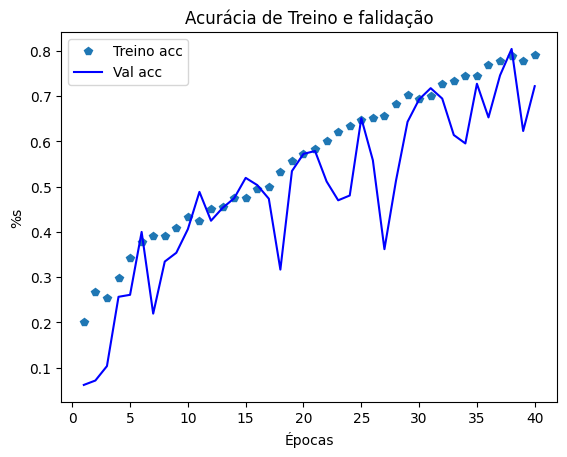

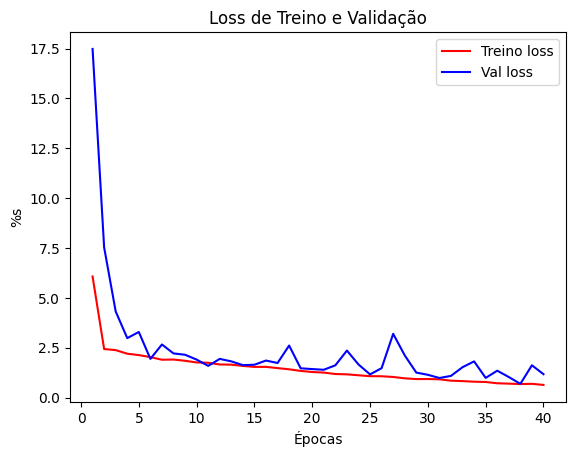

In [65]:
from matplotlib import pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
epochs = range(1, len (accuracy) + 1)
plt.plot(epochs, accuracy, "p", label="Treino acc")
plt.plot(epochs, val_accuracy, "b", label="Val acc")
plt.xlabel ("Épocas")
plt.ylabel ("%s")
plt.title("Acurácia de Treino e falidação")
plt.legend( )
plt.figure()
plt.plot(epochs, loss, "r", label="Treino loss")
plt.plot(epochs, val_loss, "b", label="Val loss")
plt.xlabel ("Épocas")
plt.ylabel ("%s")
plt.title("Loss de Treino e Validação")
plt.legend()
plt.show()


In [66]:
from keras.preprocessing import image
import numpy as np

#teste com alguma imagem para ver se reconhece

test_img = image.load_img("/content/test_images/treino/buckingham_palace/06241649_9197185346.jpg", target_size=(256,256))
x = image.array_to_img(test_img)
x = np.expand_dims(x, axis=0)
pred=model1.predict(x)
label = np.argmax(pred[0])

monument_name = classs_names_monument[label]

print("Monumento localizado: ", monument_name)

1/1 [==============================] - 0s 198ms/step
Monumento localizado:  buckingham_palace


# Geração do modelo 3D

In [69]:
src = '/content/train'
val_scenes = []
for f in os.scandir(src):
    if f.is_dir():
        cur_scene = os.path.split(f)[-1]
        print(f'Found scene "{cur_scene}"" at {f.path}')
        val_scenes += [cur_scene]

Found scene "st_peters_square"" at /content/train/st_peters_square
Found scene "temple_nara_japan"" at /content/train/temple_nara_japan
Found scene "lincoln_memorial_statue"" at /content/train/lincoln_memorial_statue
Found scene "pantheon_exterior"" at /content/train/pantheon_exterior
Found scene "notre_dame_front_facade"" at /content/train/notre_dame_front_facade
Found scene "taj_mahal"" at /content/train/taj_mahal
Found scene "sagrada_familia"" at /content/train/sagrada_familia
Found scene "sacre_coeur"" at /content/train/sacre_coeur
Found scene "grand_place_brussels"" at /content/train/grand_place_brussels
Found scene "british_museum"" at /content/train/british_museum
Found scene "buckingham_palace"" at /content/train/buckingham_palace
Found scene "piazza_san_marco"" at /content/train/piazza_san_marco
Found scene "colosseum_exterior"" at /content/train/colosseum_exterior
Found scene "brandenburg_gate"" at /content/train/brandenburg_gate
Found scene "trevi_fountain"" at /content/trai

In [70]:
# Utilizaremos as funções de construção disponíveis no repositório de Localização Hierárquica do GitHub
# Foi uma solução desenvolvida por Paul Sarlin com Philipp Lindenberger

# Este processo é um pouco demorado (2 a 4 min em média). Tenha paciênciaaa! Rrrs
!git clone --quiet --recursive https://github.com/cvg/Hierarchical-Localization/
!rm -rf /content/Hierarchical-Localization/datasets
%cd Hierarchical-Localization

!pip install --progress-bar off --quiet -e .
!pip install --progress-bar off --quiet --upgrade plotly


#import hloc
import tqdm, tqdm.notebook
tqdm.tqdm = tqdm.notebook.tqdm  # notebook-friendly progress bars
from pathlib import Path

from hloc import extract_features, match_features, reconstruction, visualization, pairs_from_exhaustive
from hloc.visualization import plot_images, read_image
from hloc.utils import viz_3d

/content/Hierarchical-Localization/Hierarchical-Localization
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [71]:
# Escolha dentre a lista de pastas, uma que contem o monumento a ser criada a representação 3D.
#images = Path('datasets/sacre_coeur')
images = Path(f'/content/test_images/validacao/{monument_name}')

In [72]:
# Setup
# Aqui definiremos as saídas das features necessárias para criação da representação 3D
# Será utilizada as ferramentas SuperPoint local features com SuperGlue matcher

outputs = Path('outputs/demo/')
#!rm -rf $outputs
sfm_pairs = outputs / 'pairs-sfm.txt'
loc_pairs = outputs / 'pairs-loc.txt'
sfm_dir = outputs / 'sfm'
features = outputs / 'features.h5'
matches = outputs / 'matches.h5'

feature_conf = extract_features.confs['disk']
matcher_conf = match_features.confs['disk+lightglue']

/content/test_images/validacao/buckingham_palace
10 mapping images


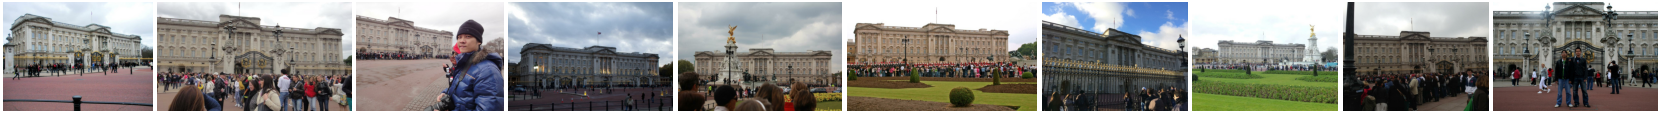

In [73]:
# Mapeamento 3D
# Será listado algumas imagens para que se veja que as imagens correspondem ao monumento selecionado

#import os
import random
print(images)

# Serão mostradas apenas 10 imagens. A medida que se aumenta o número de imagens, o tempo aumenta praticamente de forma exponencial.
# Por isso, a título de exemplo e para demonstração do desafio, usaremos apenas 10 imagens do banco, selecionadas de forma aleatória.
# Porém, o banco foi utilizado de maneira completa no modelo de rede neural para classificação
references = random.sample([str(p.relative_to(images)) for p in (images).iterdir()],10) # Imagens do objeto selecionadas de forma aleatória no diretório

# Imprimindo a quantidade de imagens a serem utilizadas. Confirmando as 10 acionadas
print(len(references), "mapping images")

# Set the backend
plot_images([read_image(images / r) for r in references], dpi=25)

In [74]:
# Será extraída as característias das imagens enviadas, verificando as similaridades par a par. É feita uma combinação do total de imagens enviadas, agrupadas 2 a 2
# Este processo é um pouco demorado (5 a 10 min em média. Dependendo do ambiente, até 20 min). Tenha paciênciaaa! Rrrs

extract_features.main(feature_conf, images, image_list=references, feature_path=features)
pairs_from_exhaustive.main(sfm_pairs, image_list=references)
match_features.main(matcher_conf, sfm_pairs, features=features, matches=matches);

[2024/04/28 06:46:59 hloc INFO] Extracting local features with configuration:
{'model': {'max_keypoints': 5000, 'name': 'disk'},
 'output': 'feats-disk',
 'preprocessing': {'grayscale': False, 'resize_max': 1600}}


  0%|          | 0/10 [00:00<?, ?it/s]

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.

[2024/04/28 06:47:01 hloc INFO] Finished exporting features.
[2024/04/28 06:47:01 hloc INFO] Found 45 pairs.
[2024/04/28 06:47:01 hloc INFO] Matching local features with configuration:
{'model': {'features': 'disk', 'name': 'lightglue'},
 'output': 'matches-disk-lightglue'}
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning:

This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



  0%|          | 0/45 [00:00<?, ?it/s]

[2024/04/28 06:47:08 hloc INFO] Finished exporting matches.


In [75]:
model = reconstruction.main(sfm_dir, images, sfm_pairs, features, matches, image_list=references)

[2024/04/28 06:47:19 hloc INFO] Creating an empty database...
[2024/04/28 06:47:20 hloc INFO] Importing images into the database...
[2024/04/28 06:47:20 hloc INFO] Importing features into the database...


  0%|          | 0/10 [00:00<?, ?it/s]

[2024/04/28 06:47:20 hloc INFO] Importing matches into the database...


  0%|          | 0/45 [00:00<?, ?it/s]

[2024/04/28 06:47:20 hloc INFO] Performing geometric verification of the matches...
[2024/04/28 06:47:21 hloc INFO] Running 3D reconstruction...
[2024/04/28 06:47:51 hloc INFO] Reconstructed 1 model(s).
[2024/04/28 06:47:51 hloc INFO] Largest model is #0 with 10 images.
[2024/04/28 06:47:51 hloc INFO] Reconstruction statistics:
Reconstruction:
	num_reg_images = 10
	num_cameras = 10
	num_points3D = 5301
	num_observations = 28811
	mean_track_length = 5.43501
	mean_observations_per_image = 2881.1
	mean_reprojection_error = 0.870191
	num_input_images = 10


In [76]:
fig = viz_3d.init_figure()
viz_3d.plot_reconstruction(fig, model, color='rgba(255,0,0,0.5)', name="mapping", points_rgb=True)
fig.show()

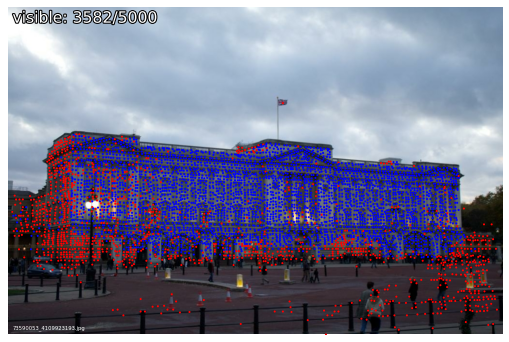

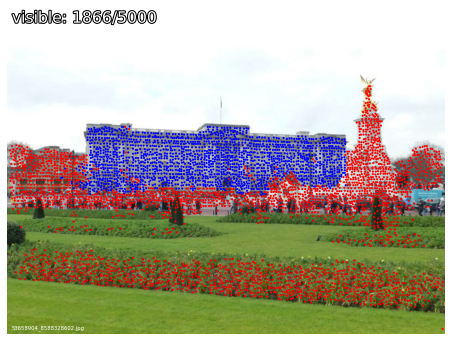

In [77]:
visualization.visualize_sfm_2d(model, images, color_by='visibility', n=2)